In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
%matplotlib inline

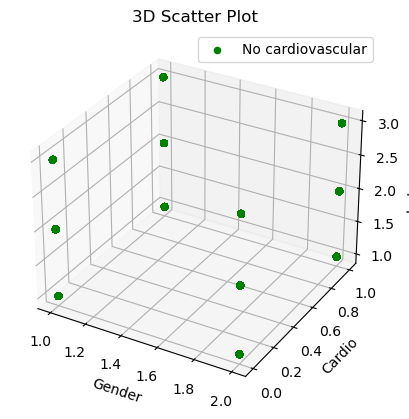

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your data
df = pd.read_csv('project_data.csv')


# Select the numeric columns for the 3D scatter plot
x = filtered_df['gender']
y = filtered_df['cardio']
z = filtered_df['cholesterol']
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='Green')

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Cardio')
ax.set_zlabel('cholesterol')
ax.set_title('3D Scatter Plot')

plt.legend(['No cardiovascular', 'Cardiovascular'])
plt.show()


In [2]:
df=pd.read_csv('project_data.csv')

In [3]:
df


,id,age,gender,height,weight,Systolic\n blood pressure,Diastolic \nblood pressure,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### df.head

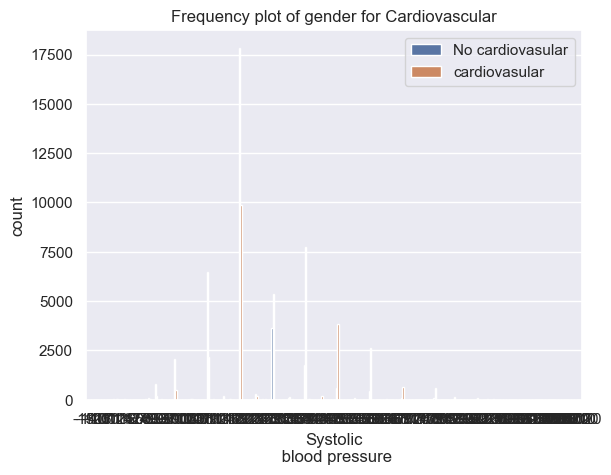

In [6]:
sns.countplot(data=df,
             x='Systolic\n blood pressure',
             hue="cardio"
             ).set(title='Frequency plot of gender for Cardiovascular')
plt.legend(['No cardiovasular', 'cardiovasular'])
plt.show()

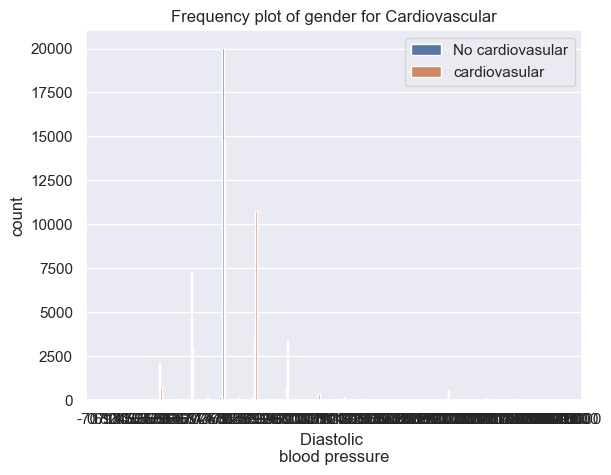

In [7]:
sns.countplot(data=df,
             x='Diastolic \nblood pressure',
             hue="cardio"
             ).set(title='Frequency plot of gender for Cardiovascular')
plt.legend(['No cardiovasular', 'cardiovasular'])
plt.show()

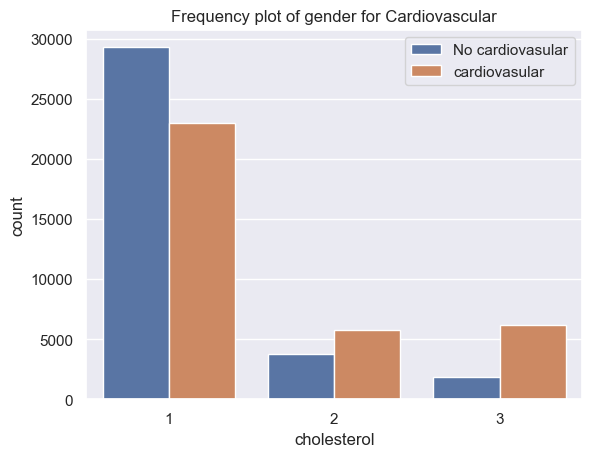

In [8]:
sns.countplot(data=df,
             x='cholesterol',
             hue="cardio"
             ).set(title='Frequency plot of gender for Cardiovascular')
plt.legend(['No cardiovasular', 'cardiovasular'])
plt.show()

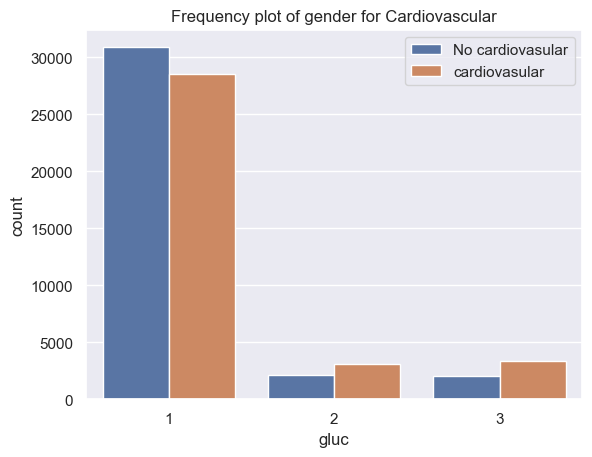

In [9]:
sns.countplot(data=df,
             x='gluc',
             hue="cardio"
             ).set(title='Frequency plot of gender for Cardiovascular')
plt.legend(['No cardiovasular', 'cardiovasular'])
plt.show()

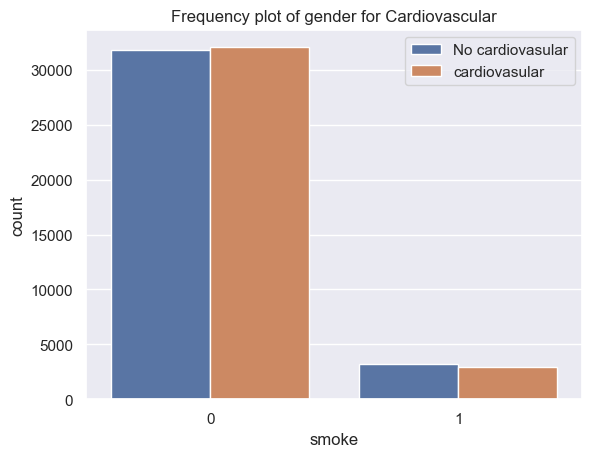

In [10]:
sns.countplot(data=df,
             x='smoke',
             hue="cardio"
             ).set(title='Frequency plot of gender for Cardiovascular')
plt.legend(['No cardiovasular', 'cardiovasular'])
plt.show()

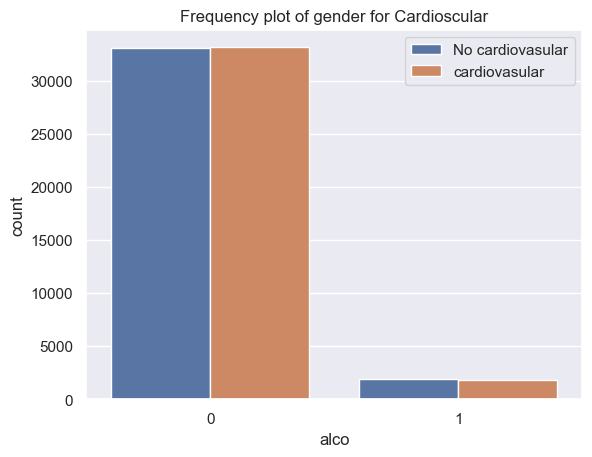

In [11]:
sns.countplot(data=df,
             x='alco',
             hue="cardio"
             ).set(title='Frequency plot of gender for Cardioscular')
plt.legend(['No cardiovasular', 'cardiovasular'])
plt.show()

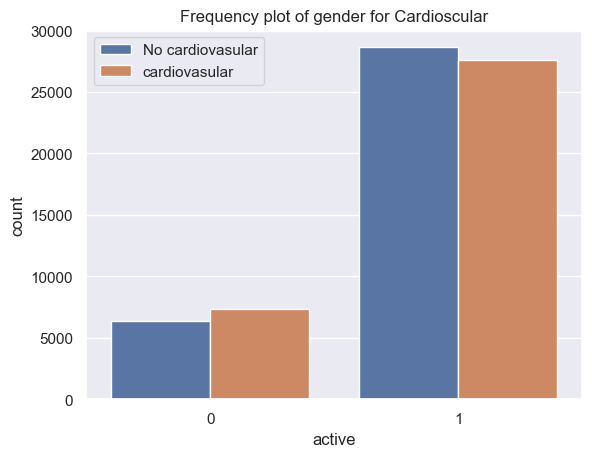

In [12]:
sns.countplot(data=df,
             x='active',
             hue="cardio"
             ).set(title='Frequency plot of gender for Cardioscular')
plt.legend(['No cardiovasular', 'cardiovasular'])
plt.show()

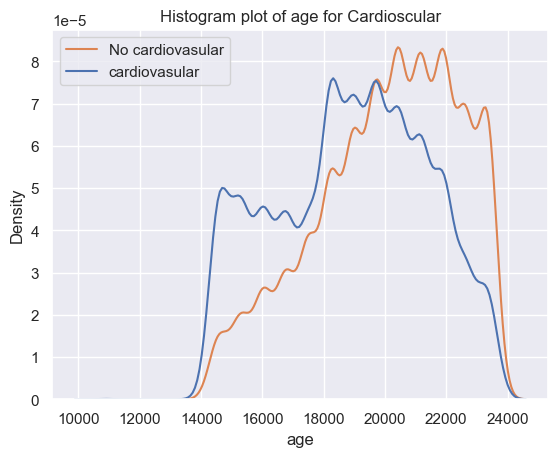

In [13]:
sns.kdeplot(data=df,
             x='age',
             hue="cardio"
             ).set(title='Histogram plot of age for Cardioscular')
plt.legend(['No cardiovasular', 'cardiovasular'])
plt.show()

# DATA PREPROCESSING

In [14]:
from sklearn.preprocessing import OrdinalEncoder
df['gender'] = np.where((df['gender'] == 'Other'), 'Female', df['gender'])
enc = OrdinalEncoder()
df[["gender", "Diastolic \nblood pressure", "Systolic\n blood pressure"]] = enc.fit_transform(df[["gender", "Diastolic \nblood pressure", "Systolic\n blood pressure"]])
df = pd.get_dummies(df, columns = ['cholesterol', 'smoke'])

In [15]:
from sklearn.impute import KNNImputer
nan = np.nan
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_data = imputer.fit_transform(df)
df_temp = pd.DataFrame(imputed_data)
df_temp.columns = df.columns
df['gluc'] = df_temp['gluc']

# FEATURE ENGINEERING

In [16]:
df.drop(['id', 'Systolic\n blood pressure'], axis=1, inplace=True)

In [17]:
df.head()

,age,gender,height,weight,Diastolic \nblood pressure,gluc,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,smoke_0,smoke_1
0,18393,1.0,168,62.0,43.0,1.0,0,1,0,1,0,0,1,0
1,20228,0.0,156,85.0,53.0,1.0,0,1,1,0,0,1,1,0
2,18857,0.0,165,64.0,33.0,1.0,0,0,1,0,0,1,1,0
3,17623,1.0,169,82.0,63.0,1.0,0,1,1,1,0,0,1,0
4,17474,0.0,156,56.0,23.0,1.0,0,0,0,1,0,0,1,0


In [18]:
 shift_to_start = df.pop("cardio")
df.insert(0, "cardio", shift_to_start)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled,y_train_resampled, test_size = 0.2, random_state = 1)


In [21]:
 import matplotlib
matplotlib.rc_file_defaults()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score,classification_report

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
df.describe()

,cardio,age,gender,height,weight,Diastolic \nblood pressure,gluc,alco,active,cholesterol_1,cholesterol_2,cholesterol_3,smoke_0,smoke_1
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499700,19468.865814,0.349571,164.359229,74.205690,45.318414,1.226457,0.053771,0.803729,0.748357,0.136414,0.115229,0.911871,0.088129
std,0.500003,2467.251667,0.476838,8.210126,14.395757,12.768488,0.572270,0.225568,0.397179,0.433960,0.343230,0.319300,0.283484,0.283484
min,0.000000,10798.000000,0.000000,55.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17664.000000,0.000000,159.000000,65.000000,43.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,19703.000000,0.000000,165.000000,72.000000,43.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,21327.000000,1.000000,170.000000,82.000000,53.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,23713.000000,1.000000,250.000000,200.000000,156.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df_num=pd.read_csv('project_data.csv')
df_num

,id,age,gender,height,weight,Systolic\n blood pressure,Diastolic \nblood pressure,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [25]:
X = df_num[['age','gender','height','weight','Systolic\n blood pressure','Diastolic \nblood pressure','cholesterol','gluc','smoke','alco','active']].values

In [26]:
X.shape

(70000, 11)

In [27]:
y = df_num['cardio'].values

In [28]:
y.shape

(70000,)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49000, 11)
(21000, 11)
(49000,)
(21000,)


In [30]:
regressor = LinearRegression()

In [31]:
regressor.fit(X_train,y_train)

LinearRegression()

In [32]:
y_predict = regressor.predict(X_test)

In [33]:
error = np.sum((y_test-y_predict)**2)

In [34]:
y_test.shape
y_predict.shape

(21000,)

In [35]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted': y_predict})
df_result


,Actual,Predicted
0,0,0.431475
1,0,0.841564
2,0,0.265700
3,0,0.403700
4,1,0.566672
...,...,...
20995,1,0.442396
20996,0,0.269833
20997,0,0.402671
20998,0,0.461005


In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.4409667729643763
Mean Squared Error: 0.22078089885199373
Root Mean Squared Error: 0.46987327956800623


# logistic_regression

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [38]:
 y_pred = clf.predict(X_test)

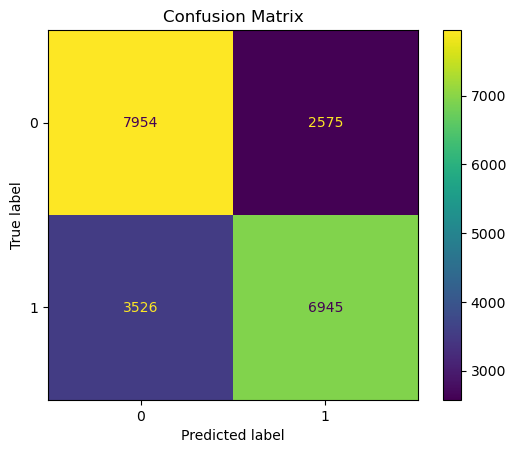

In [39]:
 ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


In [40]:
 print('Accuracy Score')
print(accuracy_score(y_test, y_pred))
print()
print('Precision Score')
print(precision_score(y_test, y_pred))
print()
print('Recall Score')
print(recall_score(y_test, y_pred))
print()
print('F1 Score')
print(f1_score(y_test, y_pred))


Accuracy Score
0.7094761904761905

Precision Score
0.729516806722689

Recall Score
0.6632604335784548

F1 Score
0.6948126656995648


In [41]:
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))


              precision    recall  f1-score   support

           0       0.69      0.76      0.72     10529
           1       0.73      0.66      0.69     10471

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



# Random_forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [43]:
 y_pred = clf.predict(X_test)

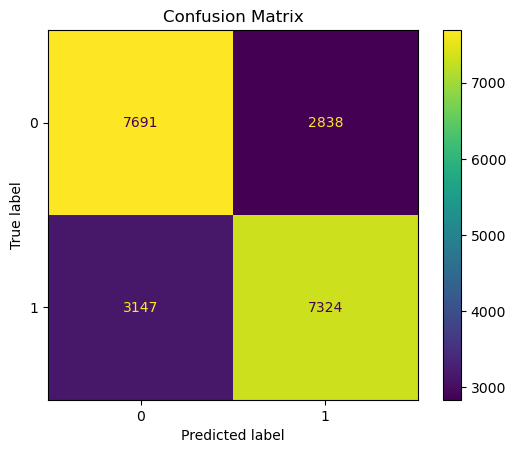

In [44]:
 ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


In [45]:
 print('Accuracy Score')
print(accuracy_score(y_test, y_pred))
print()
print('Precision Score')
print(precision_score(y_test, y_pred))
print()
print('Recall Score')
print(recall_score(y_test, y_pred))
print()
print('F1 Score')
print(f1_score(y_test, y_pred))


Accuracy Score
0.715

Precision Score
0.7207242668765991

Recall Score
0.699455639384968

F1 Score
0.7099306935491687


In [46]:
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))


              precision    recall  f1-score   support

           0       0.71      0.73      0.72     10529
           1       0.72      0.70      0.71     10471

    accuracy                           0.71     21000
   macro avg       0.72      0.71      0.71     21000
weighted avg       0.72      0.71      0.71     21000



# support vector machine

In [47]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [48]:
 y_pred = clf.predict(X_test)

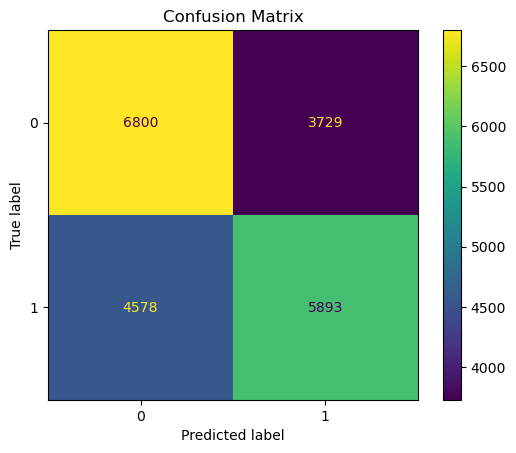

In [49]:
 ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


In [50]:
 print('Accuracy Score')
print(accuracy_score(y_test, y_pred))
print()
print('Precision Score')
print(precision_score(y_test, y_pred))
print()
print('Recall Score')
print(recall_score(y_test, y_pred))
print()
print('F1 Score')
print(f1_score(y_test, y_pred))

Accuracy Score
0.6044285714285714

Precision Score
0.6124506339638329

Recall Score
0.5627924744532519

F1 Score
0.5865724381625442


In [51]:
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))


              precision    recall  f1-score   support

           0       0.60      0.65      0.62     10529
           1       0.61      0.56      0.59     10471

    accuracy                           0.60     21000
   macro avg       0.61      0.60      0.60     21000
weighted avg       0.61      0.60      0.60     21000

